# 1.감성대화말뭉치

In [40]:
import pandas as pd

file1_train = 'data/감성대화말뭉치(최종데이터)_Training.csv'
file1_test = 'data/감성대화말뭉치(최종데이터)_Validation.csv'

train1  = pd.read_csv(file1_train)
test1 = pd.read_csv(file1_test)

### 문장, 감정 대분류 칼럼만 남기고 순서바꾸기

In [41]:
# 대분류, 문장 칼럼만 추출
train1 = train1[['감정_대분류','사람문장1']]
test1 = test1[['감정_대분류','사람문장1']]

# # 감정을 정수 라벨로 변경
# emotions = {'기쁨': 0, '불안': 1, '당황': 2, '슬픔': 3, '분노': 4, '상처': 5}
# train1['emotion'] = train1.emotion.map(emotions)

#칼럼이름 변경하고 순서 바꾸기
train1.columns = ['emotion', 'sentence']
test1.columns = ['emotion', 'sentence']  
train1 = train1.reindex(columns=['sentence', 'emotion'])
test1 = test1.reindex(columns=['sentence', 'emotion'])

train1.sample(n=5)

,sentence,emotion
3978,몇 주 뒤면 결혼식인데 결혼식을 못 하게 생겼어.,불안
28920,좋은 일이 있었어.,기쁨
43134,부모님에게 계속 의지하는 게 좋을까. 아무런 쓸모도 없는 사람 같아서 죽고 싶어.,분노
28309,늙으니 할 수 있는 일이 없어서 내 용돈벌이도 못하는 게 너무 속상해.,슬픔
14820,해냈어! 드디어 우리 부서가 에이 팀을 이겼어!,기쁨


### 데이터 수 & 결측치 확인

In [42]:
print(train1.info(),end ='\n\n')
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  51630 non-null  object
 1   emotion   51630 non-null  object
dtypes: object(2)
memory usage: 806.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  6641 non-null   object
 1   emotion   6641 non-null   object
dtypes: object(2)
memory usage: 103.9+ KB
None


In [43]:
print(train1.isnull().sum(), end = '\n\n')
print(test1.isnull().sum())

sentence    0
emotion     0
dtype: int64

sentence    0
emotion     0
dtype: int64


### 감성 대화 말뭉치 합쳐서 csv 파일로 다시 저장

In [ ]:
# file_names = ['data/감성대화말뭉치(최종데이터)_Training.csv','data/감성대화말뭉치(최종데이터)_Validation.csv']
# for file_name in file_names:
#     temp = pd.read_csv(file_name, sep='구분자', encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
#     total = pd.concat([total, temp]) #전체 데이터프레임에 추가하여 넣는다

# total.to_csv("data/감성대화망뭉치(병합).csv")

In [45]:
# 전처리된 데이터프레임 합치고 csv로 저장   
temp  = pd.concat([train1, test1])
temp    #행 숫자보면 합쳐진거 맞는데 왜 test1 행번호가 그대로일까..

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


  
중복 행 제거

In [49]:
dup = temp[temp.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

temp = temp.drop_duplicates(subset=['sentence'], keep='first')
len(temp)

중복되는 행:  31


58240

In [52]:
temp.to_csv("data/감성대화말뭉치(병합).csv")

In [53]:
import pandas as pd

# 다시 불러와서
train1  = pd.read_csv("data/감성대화말뭉치(병합).csv", index_col=0) #첫 번째 열이 인덱스 열일 때 Unnamed: 0 빼기
train1
# train1.sample(n=5)

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
6636,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,당황
6637,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,당황
6638,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,당황
6639,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,당황


### **감정 별 문장 분포**

In [54]:
# 감정 분포 확인
train1.groupby('emotion').count().iloc[:,0]

emotion
기쁨     7337
당황     9797
분노    10414
불안    10429
상처    10142
슬픔    10121
Name: sentence, dtype: int64

In [3]:
import matplotlib.pyplot as plt

# 가능한 font 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

# # 확인 이후
# plt.font_manager._rebuild() //이제 안쓴다

['STIXNonUnicode', 'DejaVu Sans', 'cmtt10', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'cmmi10', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXSizeFiveSym', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Sans', 'cmr10', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXSizeTwoSym', 'cmex10', 'STIXGeneral', 'DejaVu Serif', 'cmb10', 'DejaVu Serif', 'STIXSizeFourSym', 'cmsy10', 'DejaVu Sans Display', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXGeneral', 'cmss10', 'Franklin Gothic Medium Cond', 'MoeumT R', 'Agency FB', 'HYMyeongJo-Extra', 'Georgia', 'Parchment', 'NanumSquare_ac', 'Monotype Corsiva', 'Rockwell', 'Microsoft PhagsPa', 'Century Schoolbook', 'Arial Rounded MT Bold', 'Palace Script MT', 'Elephant', 'HCR Batang ExtB', 'Garamond', 'Microsoft YaHei', 'Bodoni MT', 'Century Schoolbook', 'Nirmala UI', 'Constantia', 'Verdana', 'Wing

In [12]:
from matplotlib import font_manager, rc
font_path = r"C:\Users\inoo3\AppData\Local\Microsoft\Windows\Fonts\NanumSquare.ttf" # 사용할 폰트명 경로 삽입 (역슬래시 대신 슬래시)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\inoo3\anaconda3\

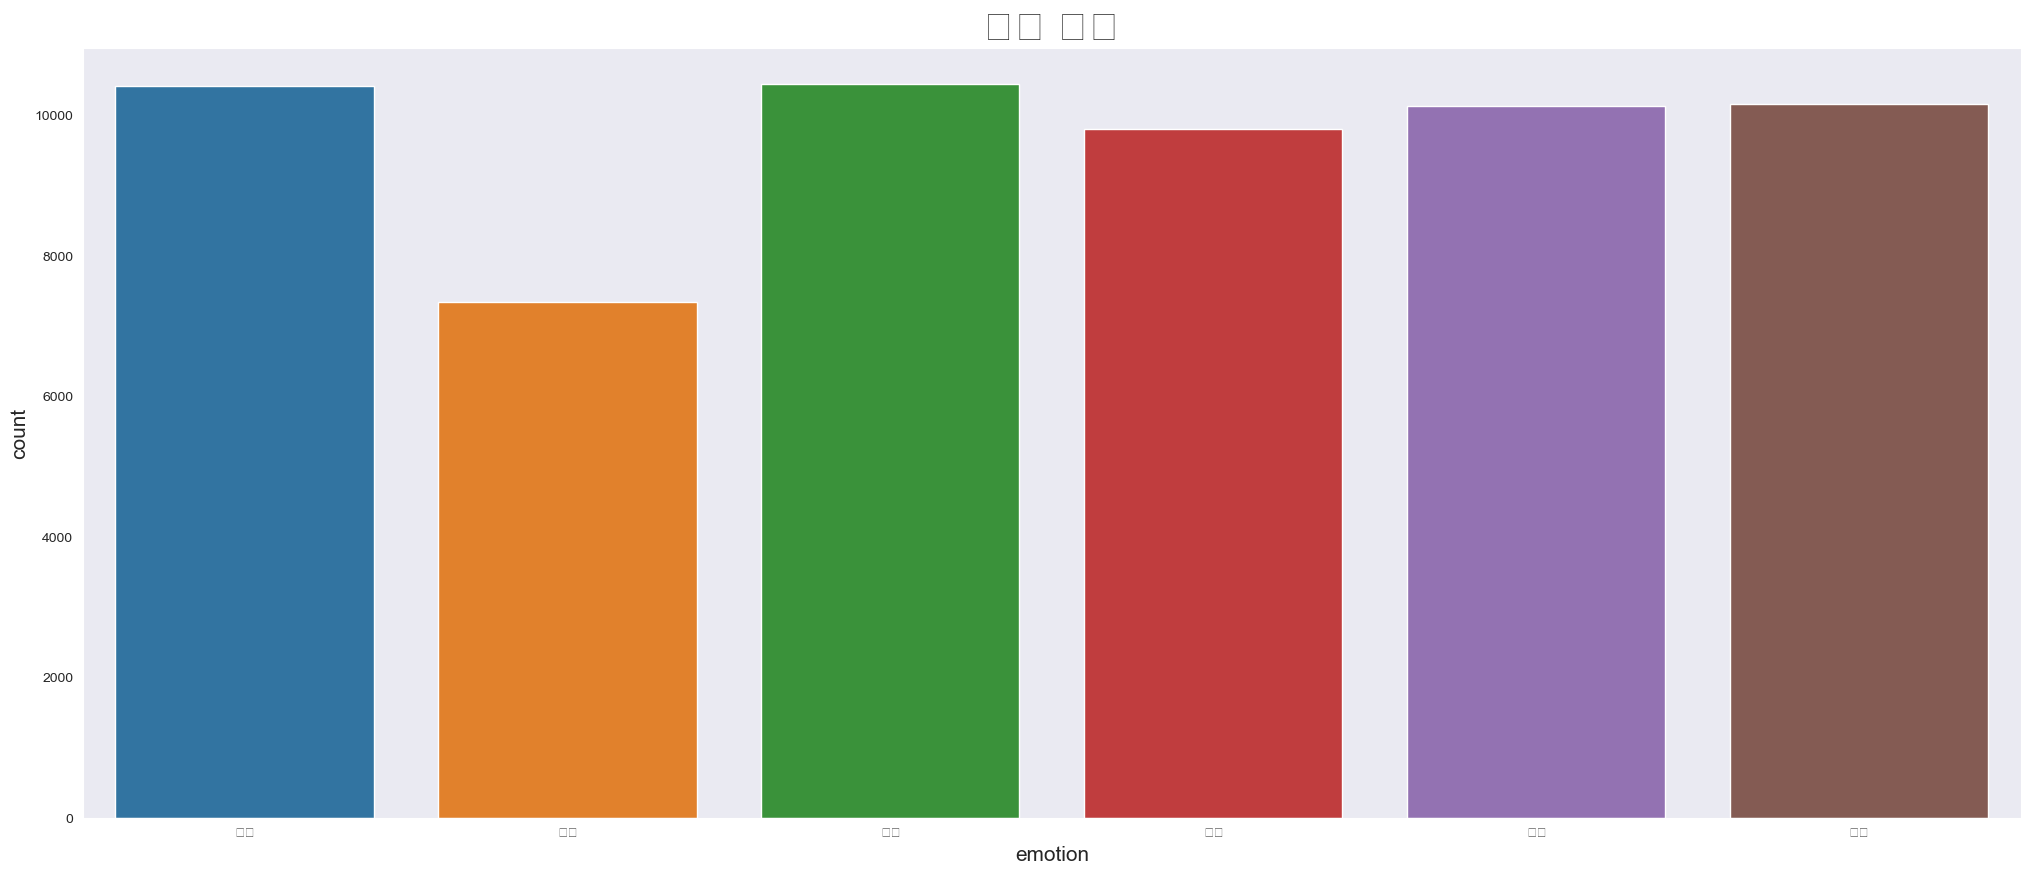

In [13]:
# countplot으로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rc('font', family='NanumSquare_ac')
plt.rcParams['figure.figsize'] = [25,10]
sns.set_style("dark")
sns.countplot(x='emotion',data=train1)
plt.title('감정 분포', fontsize=30)
plt.xlabel('emotion', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

# 정규화 필요한가?

# 2. 한국어 단발성 대화 데이터셋

In [55]:
import pandas as pd
file2_train = 'data/한국어_단발성_대화_데이터셋.csv'

train2 = pd.read_csv(file2_train)
train2.sample(n=5)

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
28860,도니오빠도 하는 일들 모두 실타래 처럼 잘 풀렸음해요^^,행복,NaN,NaN,NaN,NaN,NaN
14587,책임있는 쌔뀌들아.,분노,NaN,NaN,NaN,NaN,NaN
9574,경호대는 놀았나? 왜 기록이 없지?,놀람,NaN,NaN,NaN,NaN,NaN
1487,살인행위네~~~~~,공포,NaN,NaN,NaN,NaN,NaN
31200,감사혀유!! ^^,행복,NaN,NaN,NaN,NaN,NaN


In [56]:
#필요한 칼럼만 추출
train2 = train2[['Sentence','Emotion']]

#칼럼이름 변경
train2.columns = ['sentence', 'emotion']
train2.sample(n=5)

,sentence,emotion
29956,어제 홈런은 정말 멋졌는데..,행복
3344,전 좋으면 괜찮을거라 생각들어서 과감히 사긴했는데 사고나니 걱정이 들긴해요,공포
31905,구위가 정말 좋았다.,행복
17015,중국은 그에비하면 양반격이지.,분노
6925,나는 이때까지 화가들이 자기혼자 다 그리는줄 알았네,놀람


결측치 확인

In [57]:
print(train2.info(), end = '\n\n')
print(train2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  38594 non-null  object
 1   emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB
None

sentence    0
emotion     0
dtype: int64


중복행 확인, 제거

In [58]:
dup = train2[train2.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

train2 = train2.drop_duplicates(subset=['sentence'], keep='first')
len(train2)

중복되는 행:  85


38509

In [59]:
# 감정 분포 확인
train2.groupby('emotion').count().iloc[:,0]

emotion
공포    5461
놀람    5886
분노    5662
슬픔    5244
중립    4827
행복    6003
혐오    5426
Name: sentence, dtype: int64

In [60]:
train2.to_csv("data/단발성대화.csv")

# 3. 한국어 연속적 대화 데이터셋

In [61]:
import pandas as pd
file3_train = 'data\한국어_연속적_대화_데이터셋.csv'    #슬라시 방향 상관 없다?

train3 = pd.read_csv(file3_train)
train3.sample(n=5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
23837,NaN,뭐?,놀람,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26009,NaN,없어. 끊어.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16977,NaN,나 걔네들한테 형 이름도 말해버렸는데...,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46026,NaN,잘될거에요. 보란 듯이 팀에 들어가서 아버지 자랑스런 아들 되드릴거에요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21571,NaN,당장은 편할지 모르지만 반환점에서 표식을 받은 이후로는 후발대가 훨씬 불리해. 지켜...,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#필요한 칼럼만 추출
train3 = train3[['Unnamed: 1','Unnamed: 2']]

#칼럼이름 변경
train3.columns = ['sentence', 'emotion']
train3.sample(n=5)

,sentence,emotion
17590,쟤 그럼 너한테 배운 거니?,놀람
38232,예?,놀람
53496,……여어.,중립
731,이제...저 물고기까지 봐야 합니까?,혐오
9428,그럼 신발 한짝 벗어놓고 가.,중립


In [63]:
print(train3.info(), end = '\n\n')
print(train3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55629 entries, 0 to 55628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  55628 non-null  object
 1   emotion   55622 non-null  object
dtypes: object(2)
memory usage: 869.3+ KB
None

sentence    1
emotion     7
dtype: int64


__결측치 존재__

In [64]:
null_df = train3[train3.isnull().any(axis=1)]
null_df

,sentence,emotion
3707,저도 저희 반 학생이 도둑질을 했다고 믿고 싶진 않아요. 아마 서로 오해가 있었던 ...,NaN
30644,다 봤니? 다 못 봤으면 나머지 해줄까?,NaN
31816,그러니까. 돌 같은 걸 씹어서 이가 부러진 경우가 아니면.실상 보상을 받을 수 없다...,NaN
46290,NaN,NaN
47149,뭐가?,NaN
48754,창업은 실제 해보니까 어땠어요?,NaN
50535,안에는 들어가 봤나?,NaN


**결측치 있는 행 삭제**  
55629 -> 55622, 7개 모두 지워진거 확인

In [65]:
train3 = train3.dropna()
train3.shape

(55622, 2)

__중복 행 확인, 제거__

In [66]:
dup = train3[train3.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

train3 = train3.drop_duplicates(subset=['sentence'], keep='first')
len(train3)

중복되는 행:  4389


51233

In [67]:
# 감정 분포 확인
train3.groupby('emotion').count().iloc[:,0]

emotion
ㄴ중립        1
ㅈ중립        1
ㅍ         12
감정         1
공포        95
놀람      3874
분          4
분ㄴ         1
분노      3536
슬픔      1848
줄          1
중림         1
중립     40683
행복       983
혐오       192
Name: sentence, dtype: int64

오타가 다수 존재
<br>
우선 알아 볼 수 있는건 아래와 같이 치환하고 나머지를 확인  
|ㄴ중립, ㅈ중립, 중림|중립|  
|-----------|---|  
|**분, 분ㄴ**|**분노**|  

In [68]:
train3.loc[train3['emotion'].isin(('ㄴ중립','ㅈ중립','중림')), 'emotion'] = '중립'
train3.loc[train3['emotion'].isin(('분','분ㄴ')), 'emotion'] = '분노'

In [69]:
train3[train3['emotion'].isin(['ㅍ', '감정','줄'])]

,sentence,emotion
0,발화,감정
25037,인터넷에다 팔아야 되나.. 근데 너 이제 맘 잡았나보다?,ㅍ
27177,일부러 그럴 리가 있어요?,ㅍ
27948,그럼요?,ㅍ
28090,샤프심이 없어서..가지러 왔다가 누나 보이길래..,ㅍ
28455,아~ 자기소개서 쓰기 힘들어 죽겠어요~,ㅍ
28482,원래 남자들..다른 남자랑 친하게 지내면 그러니까..,ㅍ
36684,"그럼, 임마! 내가 누구냐? 한번 실수는 병가지상사다~이러시면서 나의 인간성과 품위...",ㅍ
37261,"처리 할거야. 처리해야지, 그게 돈이 얼만데?",ㅍ
37428,"와, 어디서 꽁돈이라도 생겼나?",ㅍ


0행은 원본 파일에서 열이름으로 쓰인거 같고 'ㅍ','줄'은 구분이 어려움  
--> 모두 삭제

In [70]:
train3 = train3.drop(train3[train3['emotion'].isin(['ㅍ', '감정','줄'])].index)
#train3 = train3[~train3['emotion'].isin(['가나', '다라'])]

다시 분포 확인

In [71]:
train3.groupby('emotion').count().iloc[:,0]

emotion
공포       95
놀람     3874
분노     3541
슬픔     1848
중립    40686
행복      983
혐오      192
Name: sentence, dtype: int64

전처리 끝난 데이터 프레임 저장

In [72]:
train3.to_csv("data/연속적대화.csv")

## __입력 데이터 병합 & 전처리__

In [2]:
import pandas as pd
trainset1 = pd.read_csv("data/감성대화말뭉치(병합).csv",index_col=0)
trainset2 = pd.read_csv("data/단발성대화.csv",index_col=0)
trainset3 = pd.read_csv("data/연속적대화.csv",index_col=0)
trainset = [trainset1, trainset2, trainset3]

라벨, 분포 확인

In [3]:
for t in trainset:
    print(sorted(t['emotion'].unique()))
    print(t.groupby('emotion').count().iloc[:,0])

['기쁨', '당황', '분노', '불안', '상처', '슬픔']
emotion
기쁨     7337
당황     9797
분노    10414
불안    10429
상처    10142
슬픔    10121
Name: sentence, dtype: int64
['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']
emotion
공포    5461
놀람    5886
분노    5662
슬픔    5244
중립    4827
행복    6003
혐오    5426
Name: sentence, dtype: int64
['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']
emotion
공포       95
놀람     3874
분노     3541
슬픔     1848
중립    40686
행복      983
혐오      192
Name: sentence, dtype: int64


### 레이블 맞추고 병합

__감성대화말뭉치__  
- 기쁨 -> 행복, 당황->놀람, 불안->공포

In [4]:
trainset1.loc[trainset1['emotion'] == '기쁨', 'emotion'] = '행복'
trainset1.loc[trainset1['emotion'] == '당황', 'emotion'] = '놀람'

- 상처, 슬픔 라벨이 구별이 안됨 -> 병합

In [5]:
trainset1[trainset1['emotion'] == '상처'].sample(n=8)

,sentence,emotion
43359,아빠가 또 술 마시고 엄마를 때렸어. 늘 있는 일이라서 놀라진 않았지만 엄마가 걱정 돼.,상처
28725,옛날에 친했던 친구가 있는데 그 친구가 나를 이용했어. 너무 어이없고 배신감을 느껴.,상처
41308,음식이 맛이 없다고 평생을 음식 투정이야.,상처
981,우리 부서가 옆 부서와 통합된다는 소식을 들어서 충격이야.,상처
9763,결혼 초에 남편이 자영업을 하면서 주식 투자를 했었어.,상처
48495,우울증 때문에 취업이 안 돼서 걱정이야. 빨리 취업을 해야 하는데.,상처
48597,담배를 너무 피운 탓에 폐가 상해서 뜨거운 걸 못 먹을 정도야. 너무 후회돼.,상처
600,친한 친구가 나를 범인으로 모는 바람에 선생님한테 혼났어. 상처 받았어.,상처


In [5]:
trainset1[trainset1['emotion'] == '슬픔'].sample(n=8)

,sentence,emotion
6021,피부가 하루하루 다르게 노화되는 것 같아 속상해.,슬픔
23079,이제 여기서 일할 수 있는 시간이 얼마 남지 않은 것 같은데 이직이 쉽지 않네.,슬픔
38520,노후준비가 안 되어서 정말 슬프다.,슬픔
47525,이번 시험이 저번 시험보다 구 점이나 떨어져서 너무 슬퍼.,슬픔
47631,장애를 가진 나를 평생 돌봐주었던 아내와 이혼을 하니까 쓸쓸하고 눈물이 나.,슬픔
13566,매일 바쁘게 일하는 엄마와 아빠를 생각하면 눈물만 나.,슬픔
50230,나는 아무것도 하지 않았는데 술만 드시면 아버지가 나를 때려.,슬픔
5341,장거리 연애는 불편함이 너무 많은 것 같아.,슬픔


In [6]:
trainset1.loc[trainset1['emotion'] == '상처', 'emotion'] = '슬픔'

In [7]:
trainset1[trainset1['emotion'] == '불안'].sample(n=8)

,sentence,emotion
509,모임에 가서 친구를 사귀었는데 뭔가 계산적인 사람이란 게 느껴져서 불안해.,불안
47815,앓고 있는 지병은 지속적인 치료가 필요한데 너무 가난해서 중단한 지 오래야.,불안
47165,난 다리에 장애가 있어서 걷기를 잘 못해. 곧 대학교 입학 면접에서 넘어질까 봐 걱...,불안
42928,우리 집은 능력 없는 부모님 때문에 어릴 때부터 항상 가난했어. 이런 삶이 너무 무...,불안
12590,벌써 몇 시간째 못 푼 수학 문제가 있어. 이거 때문에 머리가 너무 아파.,불안
12674,이번 점수가 나왔는데 반에서는 꽤 등수가 높게 나왔어. 그런데 기분은 별로 좋지 않아.,불안
9646,매달 나가는 지출이 많아서 스트레스받네.,불안
32839,혹시 코로나에 걸리는 것은 아닐까 불안해.,불안


In [8]:
trainset1.groupby('emotion').count().iloc[:,0]

emotion
놀람     9797
분노    10414
불안    10429
슬픔    20263
행복     7337
Name: sentence, dtype: int64

__단발성대화 & 연속적대화__  
- 공포 -> 불안

In [9]:
trainset2.loc[trainset2['emotion'] == '공포', 'emotion'] = '불안'
trainset3.loc[trainset3['emotion'] == '공포', 'emotion'] = '불안'

- 혐오 태그: 데이터 수가 적고, (웹 크롤링 글이다보이니)책에서 안쓰이는 표현이 대부분, 어울리는 음악(태그)도 찾기 어려워보임
-> 삭제

In [10]:
trainset2[trainset2['emotion'] == '혐오'].sample(n=8)

,sentence,emotion
34587,끼리끼리 노네,혐오
38485,중국에서 잡히면 사형인데,혐오
36111,전쟁 도발해서 전쟁으로 돈벌려는 계략인가?,혐오
33390,판사 미친거 아냐?,혐오
36028,니본도를 아갈에서똥고까지쳐눌테다~~,혐오
33860,ㅋㅋㅋㅋ 급하면 문도 따는 실력자들^^ 쓱~,혐오
35703,이딜가나 무도충들이 노답이지...,혐오
33553,이 새끼는 이제 도박까지 하면 트리플크라운이네. 인간 폐기물 강정호 구단에서 방출시...,혐오


In [11]:
trainset2 = trainset2[trainset2.emotion != '혐오']
trainset3 = trainset3[trainset3.emotion != '혐오']

<br>    
3 데이터셋 병합

In [12]:
trainsum = pd.concat([trainset1, trainset2, trainset3], axis=0)
len(trainsum)

142350

In [13]:
# 합쳤으니까 다시 중복 제거
dup = trainsum[trainsum.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

trainsum = trainsum.drop_duplicates(subset=['sentence'], keep='first')
len(trainsum)

중복되는 행:  17


142333

In [14]:
trainsum.groupby('emotion').count().iloc[:,0]

emotion
놀람    19553
분노    19616
불안    15985
슬픔    27354
중립    45503
행복    14322
Name: sentence, dtype: int64

In [97]:
trainsum.to_csv("data/병합데이터셋.csv")

NameError: name 'trainsum' is not defined

In [98]:
import pandas as pd

trainset  = pd.read_csv('data/병합데이터셋.csv', index_col=0)
trainset.reset_index(drop=True, inplace=True)   #행 재설정
trainset

,sentence,emotion
0,일은 왜 해도 해도 끝이 없을까? 화가 난다.,분노
1,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,분노
2,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,분노
3,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,분노
4,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,분노
...,...,...
142328,얘긴 다 끝났냐? 원예부,중립
142329,"예. 그거 때문에, 부탁이 있......는......데요.",중립
142330,여자 숨겨달라는거면 사절이다.,중립
142331,아무래도 안되나요?,중립


__한글이 없는 문장 삭제__

In [99]:
def has_korean(text):
    korean_check = lambda text: any(char >= '가' and char <= '힣' for char in text)
    return korean_check(text)

df_filter = trainset[trainset['sentence'].apply(lambda x: not has_korean(x))]
df_filter

,sentence,emotion
68374,60??,놀람
89989,Happy brithday to you~!,행복
95640,......,중립
95668,...,중립
95670,..!,놀람
95714,…,중립
98905,50!,중립
98906,25!,중립
99422,? ...,중립
114531,7!,중립


In [100]:
# 'sentence' 열에서 한글이 있는지 확인하여 한글이 없는 행 삭제
trainset = trainset[trainset['sentence'].apply(lambda x: has_korean(x))]

# 삭제된 행에 대한 인덱스 재설정
trainset.reset_index(drop=True, inplace=True)
len(trainset)

142323

__한자가 들어간 문장__

In [101]:
trainset[trainset['sentence'].str.contains('[\u4e00-\u9fff]+')]

,sentence,emotion
59715,이정도면 광기(狂氣) 아니냐?,불안
75007,박창조 최순실 다음 너야 박원崧,분노
79839,"곧 결혼하려고 아파트나 빌라 전세, 매매 여러 방면으로 알아보고 있는 中인데요...",슬픔
89694,祝 結婚....幸福하시길...,행복
90074,새해 福 마니마니 받으세요~~~~~~,행복
139521,넌 꼭 이성(理性)의 괴물 같아.,중립


In [102]:
trainset = trainset[~trainset['sentence'].str.contains('[\u4e00-\u9fff]')]
len(trainset)

142317

영어 포함 글

In [103]:
english_contain_sentences = trainset[trainset['sentence'].str.contains('[a-zA-Z]')]
len(english_contain_sentences)

885

In [104]:
# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f)

['cmsy10', 'STIXGeneral', 'cmss10', 'cmr10', 'cmtt10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'STIXSizeFourSym', 'STIXNonUnicode', 'cmex10', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Sans', 'DejaVu Sans', 'STIXSizeFiveSym', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'STIXSizeTwoSym', 'DejaVu Serif Display', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Display', 'cmmi10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXNonUnicode', 'cmb10', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans', 'STIXSizeFourSym', 'STIXGeneral', 'DejaVu Sans Mono', 'Times New Roman', 'Wingdings', 'Californian FB', 'Segoe Print', 'Lucida Sans Typewriter', 'Franklin Gothic Heavy', 'Calibri', 'Mongolian Baiti', 'Century Schoolbook', 'Palatino Linotype', 'Bookshelf Symbol 7', 'Georgia', 'Palatino Linotype', 'Bodoni MT', 'Harrington', 'Century Schoolbook', 'UnBatang', 'NanumSquare', 'Sitka Small', 'Yu Gothic', 'HYPost-Light', 'Arial', 'Segoe 

In [105]:
# ttf 폰트 주소
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

['C:\\Windows\\Fonts\\WINGDNG3.TTF', 'C:\\Windows\\Fonts\\PERBI___.TTF', 'C:\\Windows\\Fonts\\monbaiti.ttf', 'C:\\Windows\\Fonts\\cambriaz.ttf', 'C:\\Windows\\Fonts\\AGENCYB.TTF', 'C:\\Windows\\Fonts\\CALIFB.TTF', 'C:\\Windows\\Fonts\\BOOKOSI.TTF', 'C:\\Windows\\Fonts\\times.ttf', 'C:\\Windows\\Fonts\\KUNSTLER.TTF', 'C:\\Windows\\Fonts\\LFAX.TTF', 'C:\\Windows\\Fonts\\segoeprb.ttf', 'C:\\Windows\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\simsun.ttc', 'C:\\Windows\\Fonts\\constani.ttf', 'C:\\Windows\\Fonts\\HMFMPYUN.TTF', 'C:\\Windows\\Fonts\\LSANSDI.TTF', 'C:\\Windows\\Fonts\\ERASDEMI.TTF', 'C:\\Windows\\Fonts\\FRADMCN.TTF', 'C:\\Windows\\Fonts\\CALISTI.TTF', 'C:\\Windows\\Fonts\\LFAXI.TTF', 'C:\\Windows\\Fonts\\GILB____.TTF', 'C:\\Windows\\Fonts\\cambria.ttc', 'C:\\Windows\\Fonts\\FORTE.TTF', 'C:\\Windows\\Fonts\\CHILLER.TTF', 'C:\\Windows\\Fonts\\ELEPHNTI.TTF', 'C:\\Windows\\Fonts\\FTLTLT.TTF', 'C:\\Windows\\Fonts\\Gabriola.ttf', 'C:\\Windows\\Fonts\\HANDotum.ttf', 'C:\\Windows\\Font

In [106]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns

# (한글 출력하려고) 폰트 변경
path = 'C:\\Windows\\Fonts\\NanumSquare_acL.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
print(plt.rcParams['font.family'])

['NanumSquare_ac']


In [107]:
trainset.groupby('emotion').count().iloc[:,0]

emotion
놀람    19551
분노    19615
불안    15984
슬픔    27353
중립    45495
행복    14319
Name: sentence, dtype: int64

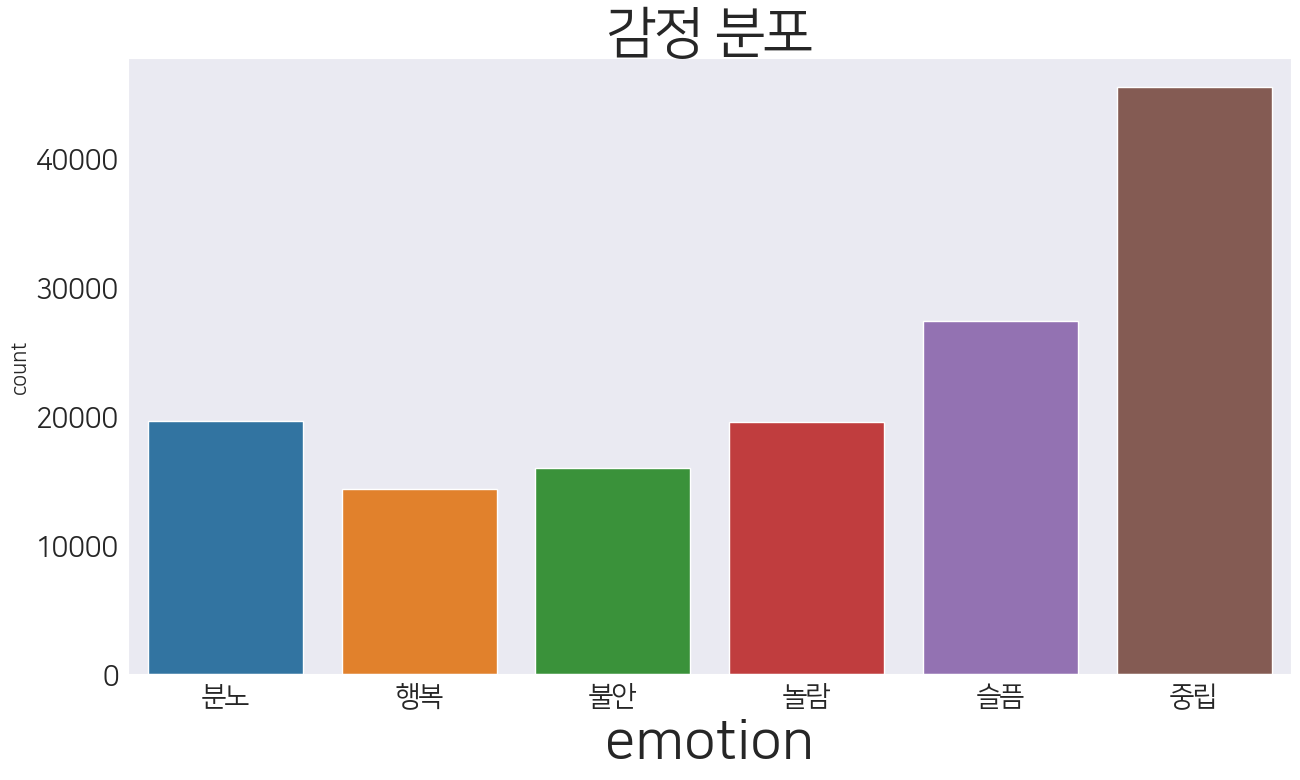

In [108]:
# countplot으로 시각화
plt.rcParams['figure.figsize'] = [15,8]
sns.countplot(x='emotion',data=trainset)
plt.rcParams['font.size'] = 20
plt.title('감정 분포', fontsize=40)
plt.xlabel('emotion', fontsize=40)
plt.ylabel('count', fontsize=15)
plt.show()

In [92]:
# import pandas as pd
# from imblearn.under_sampling import RandomUnderSampler

# # 원본 데이터프레임과 언더 샘플링할 클래스 지정
# target_class = '슬픔'

# # 슬픔 클래스의 데이터 추출
# sad_df = original_df[original_df['emotion'] == target_class].copy()

# # 샘플 개수 확인
# print("Original '슬픔' 클래스 샘플 개수:", len(sad_df))

# # 언더 샘플링 수행
# rus = RandomUnderSampler(sampling_strategy=20000/len(sad_df))
# X_resampled, y_resampled = rus.fit_resample(sad_df.drop('emotion', axis=1), sad_df['emotion'])

# # 언더 샘플링 결과 확인
# undersampled_df = pd.DataFrame(X_resampled, columns=sad_df.drop('emotion', axis=1).columns)
# undersampled_df['emotion'] = y_resampled

# # 결과 확인
# print("Undersampled DataFrame shape:", undersampled_df.shape)

Original '슬픔' 클래스 샘플 개수: 27353


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [109]:
import random
# '슬픔' 클래스의 데이터 인덱스 추출
sad_indices = trainset[trainset['emotion'] == '슬픔'].index.tolist()

# 랜덤하게 일부 데이터 인덱스 선택하여 삭제
remove_indices = random.sample(sad_indices, 6000)
trainset = trainset.drop(remove_indices)

trainset.reset_index(drop=True, inplace=True)   #행 재설정
trainset.groupby('emotion').count().iloc[:,0], len(trainset)

(emotion
 놀람    19551
 분노    19615
 불안    15984
 슬픔    21353
 중립    45495
 행복    14319
 Name: sentence, dtype: int64,
 136317)

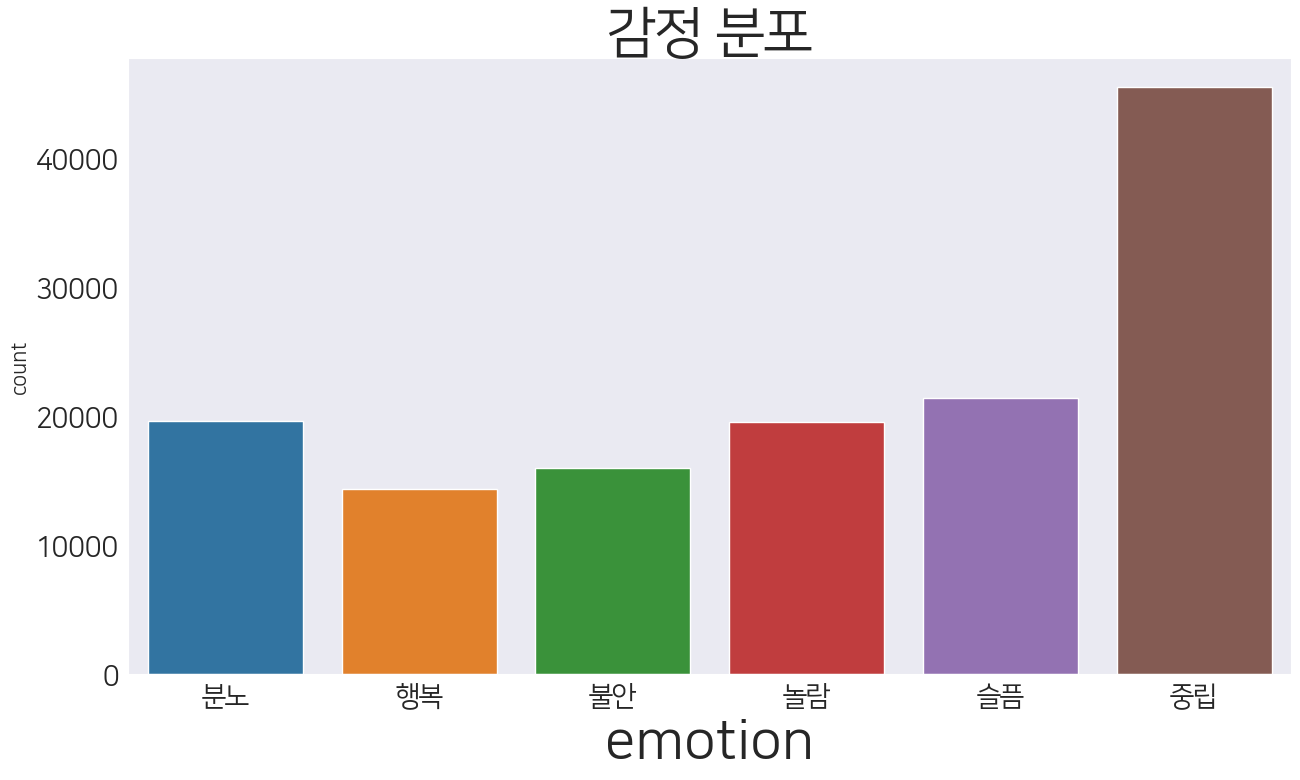

In [110]:
# countplot으로 시각화
plt.rcParams['figure.figsize'] = [15,8]
sns.countplot(x='emotion',data=trainset)
plt.rcParams['font.size'] = 20
plt.title('감정 분포', fontsize=40)
plt.xlabel('emotion', fontsize=40)
plt.ylabel('count', fontsize=15)
plt.show()

In [45]:
trainset.to_csv("data/병합데이터셋-v2.csv")

---

In [47]:
import pandas as pd
trainset = pd.read_csv('data/병합데이터셋-v2.csv', index_col=0)
trainset.shape

(136317, 2)

__OO, OOO(필터처리된 단어) 확인__

In [48]:
filter = trainset[trainset['sentence'].str.contains('OO')]
filter

,sentence,emotion
54038,정말떳떳하다면 왜이리 OOO떨까 지발저린모습이네,불안
55269,방파제고 OOO이고 쓰나미한번오면 겜.끝,불안
59945,300명 인신공양설이 진짠가보네.. OOO,놀람
60590,그 욕하는 OO어디감? 어디 아픈가 부들부들 열폭종자내ㅋㅋㅋㅋㅋ,놀람
60793,맹독이 있었다니 지금 생각하니 아찔하네 OOO...,놀람
63077,무슨 게임때문에 지도를 반출해 OOO들,놀람
65651,김상수 니는 야구그만둬라 자식아!!그따위 실력으로 프로야구한다고OOO이가!!내가 해...,분노
66078,박근혜 OOO진짜 뭐하고있냐? 쳐자냐?,분노
66210,슈틀리케 OOO 개7ㅐㄲ1야 제발좀 물러나라 개 저빠압 감독,분노
66394,꼴랑 국갓돈 백억가지고 별 유세를 다 떠네 OOO새기 ㅋㅋㅋㅋ 아베 진심 토나온다,분노


공백으로 치환 (KcELECTRA 전처리 참고)

In [49]:
trainset['sentence'] = trainset['sentence'].str.replace(r'OO+', ' ', regex=True)

__ㅋㅋ 포함 문장__

In [50]:
filter = trainset[trainset['sentence'].str.contains('ㅋㅋ')]
filter

,sentence,emotion
53948,나이만 먹어가고 이러다 결혼 못하고 죽는거 아닌지 ㅋㅋ,불안
54029,저런 중국과 친하게 지내겠다는 더불어민주당 ㅋㅋㅋㅋㅋㅋ,불안
54040,여성부 예산 보다 적넼ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,불안
54065,기사 내용이 저거밖에 없어? ㅋㅋㅋㅋㅋ,불안
54076,일반인들 신검 하면 어디아프다고 말하면 서류 때오라고 하면서 찍소리도 안하고 1급준...,불안
...,...,...
85676,12시부터 지금까지받은손님11명ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,행복
85681,형돈오빠~~ 올만에 놀러왔어여새벽 두시가 넘었는데..ㅋㅋ,행복
85682,젤로의 다비드상ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,행복
85714,응원소리 크다는 소문이 있던데 호시오빠 진정해요 ㅋㅋ,행복


3개 이상 연속되는'ㅋ'을 'ㅋㅋ'로 치환 (KcELECTRA 전처리 참고)

In [51]:
trainset['sentence'] = trainset['sentence'].str.replace(r'(ㅋ{3,})', 'ㅋㅋ', regex=True)

In [52]:
filter = trainset[trainset['sentence'].str.contains('ㅋㅋ')]
filter

,sentence,emotion
53948,나이만 먹어가고 이러다 결혼 못하고 죽는거 아닌지 ㅋㅋ,불안
54029,저런 중국과 친하게 지내겠다는 더불어민주당 ㅋㅋ,불안
54040,여성부 예산 보다 적넼ㅋㅋ,불안
54065,기사 내용이 저거밖에 없어? ㅋㅋ,불안
54076,일반인들 신검 하면 어디아프다고 말하면 서류 때오라고 하면서 찍소리도 안하고 1급준...,불안
...,...,...
85676,12시부터 지금까지받은손님11명ㅋㅋ,행복
85681,형돈오빠~~ 올만에 놀러왔어여새벽 두시가 넘었는데..ㅋㅋ,행복
85682,젤로의 다비드상ㅋㅋ,행복
85714,응원소리 크다는 소문이 있던데 호시오빠 진정해요 ㅋㅋ,행복


위와 유사한 작업: ??, ~~, !!, ㅠㅠ, ㅜㅜ, ㄱㄱ, ㅎㅎ,ㄷㄷ, --, ♥♥, ♡♡

In [72]:
filter = trainset[trainset['sentence'].str.contains('ㄱㄱ')]
filter

,sentence,emotion
60599,와 22사단은 진짜마가꼇나ㅋㅋㄱㄱ온갖사건사고는 다 터지네,놀람
61578,이젠 고등어탓도 하네 ㅋㅋㄱㄱㅋㅋ,놀람
62866,수면부족으로 실신했는데 건강 이상무 라니ㅋㅋㄲㄱㄱㄱㄱ,놀람
68688,정유라 잡은 다음 팔다리 자르고 강;간 ㄱㄱ,분노
76674,지금 나 일본에서 살고있는겨?ㄱㅋㄱㄱㅋㅋㄱㅋ,중립
76814,캔커피줬으니까 김영란법으로 드론 고소 ㄱㄱ,중립
78322,간단하네 핵무장 ㄱㄱ,중립
81629,ㄱㄱㅑ~축하축하해요~~예쁜사랑 하세요~너무 잘어울려요~,행복
81950,오늘 라스 진짜 졸잼ㅋㄱㅋㅋㄱㄱㄱ담주도 완전기대됨ㅋㄱㅋㄱㅋㄱㅋ,행복
83972,내년도 잘해서 대박 ㄱㄱㄱ,행복


In [73]:
trainset['sentence'] = trainset['sentence'].str.replace(r'\?\?{3,}', '??,', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'~{3,}', '~~', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'!{3,}', '!!', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'-{3,}', '--', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'(ㅠ{3,})', 'ㅠㅠ', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'(ㅜ{3,})', 'ㅜㅜ', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'(ㄱ{3,})', 'ㄱㄱ', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'(ㄷ{3,})', 'ㄷㄷ', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'(ㅎ{3,})', 'ㅎㅎ', regex=True)

trainset['sentence'] = trainset['sentence'].str.replace(r'(♥{2,})', '♥', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'(♡{2,})', '♡', regex=True)
trainset['sentence'] = trainset['sentence'].str.replace(r'\s{2,}', ' ', regex=True)

문장의 길이 분포 확인

In [74]:
sentence_lengths = trainset['sentence'].str.len()
sentence_distribution = sentence_lengths.value_counts().sort_index()
sentence_distribution

sentence
1         9
2       145
3       540
4       879
5      1137
       ... 
249       1
251       1
258       1
259       1
299       1
Name: count, Length: 196, dtype: int64

In [75]:
import matplotlib.font_manager as fm

fontpath = r'C:\Windows\Fonts\HMKMRHD.TTF'
font_name = fm.FontProperties(fname=fontpath, size=50).get_name()
plt.rc('font', family=font_name)
print(plt.rcParams['font.family']) #적용됬는지 확인

['Headline R']


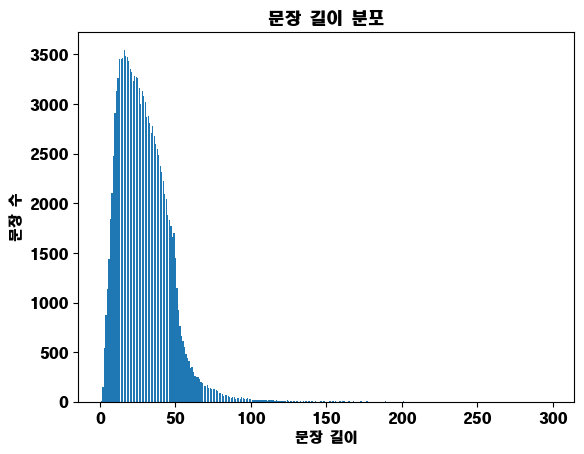

In [76]:
import matplotlib.pyplot as plt

# 문장의 길이 계산
sentence_lengths = trainset['sentence'].str.len()

# 길이 별 문장 수 계산
sentence_distribution = sentence_lengths.value_counts().sort_index()

# 그래프 그리기
plt.bar(sentence_distribution.index, sentence_distribution.values)
plt.xlabel('문장 길이')
plt.ylabel('문장 수')
plt.title('문장 길이 분포')
plt.show()

대부분 여러 문장이 합쳐진 형태  
-하나의 감정으로 레이블하기 애매할 수 있고, 실제 감성분석을 할때는 문장 단위로 분리하는 작업을 하니까 학습 데이터로서 부적절함

In [79]:
long_sentences = trainset[trainset['sentence'].str.len() >= 100]['sentence']
long_sentences, len(long_sentences)

(25640     아 결국 친구한테 빌려준 돈을 떼이게 생겼어. 급전이 필요하다고 부탁해서 여러차례 ...
 26341     이 나이 먹도록 남은 게 아무것도 없어. 이제까지 부모님 뒷바라지만 하다 보니 내 ...
 26345     내가 한때는 건강 말고는 다른 가진 게 없는 사람이었는데 이젠 온몸이 아프지 않은 ...
 27905     어제 수빈이랑 지안이랑 드디어 오해를 풀었어. 지안이랑 통화를 했는데 내가 다른 반...
 29102     아 결국 친구한테 빌려준 돈을 못 받게 생겼어. 급전이 필요하다고 부탁해서 여러차례...
                                 ...                        
 136208    그건 이미 직접 조사했네. 통화기록조사를 시작한 참이지. 이 작업은 꽤나 시간이 걸...
 136210    내가 이런 소릴 해도 설득력이 있을지는 모르겠네만 탐정 조수의 입장에 너무 매달리려...
 136218    미안하네. 지금 이건 자조하는 웃음이니 기분 상하지 말게나. 일어났는지 아닌지도 모...
 136221    자면서 어쩌고저쩌고 중얼대기에 모포를 덮어 줬네만, 그래도 덜덜 떨기에 말일세. 공...
 136309    마약 사건하고는 다르네. 우리가 할 일은 의뢰인을 끝까지 지키고 의뢰인의 아버지를 ...
 Name: sentence, Length: 526, dtype: object,
 526)

길이가 100 이상인 문장 제거

In [82]:
trainset = trainset[trainset['sentence'].str.len() < 100]

# 삭제된 행에 대한 인덱스 재설정
trainset.reset_index(drop=True, inplace=True)
len(trainset)


135791

데이터 프레임 셔플

In [83]:
from sklearn.utils import shuffle
trainset = shuffle(trainset).reset_index(drop=True)

In [84]:
trainset.to_csv('data/병합데이터셋-v3.csv', encoding='utf-8-sig')

---

일부 태그 직접 수정

In [2]:
import pandas as pd
df = pd.read_csv('data/병합데이터셋-v3a.csv', index_col=0)
df.shape

(135791, 2)

In [4]:
df= df.dropna()
df = df.drop_duplicates(subset='sentence')

__의미 없이 0으로 끝나는 패턴__

In [15]:
df_ending_with_0 = df[df['sentence'].str.endswith('0')]
df_ending_with_0.iloc[:30]

,sentence,emotion
73,근데 똥이조금 나오더라고어떻게 하냐?0,불안
378,코가 자꾸 욱신욱신 너무 아파죽겠음.0,슬픔
1646,오아시스노래를 하루중 12시간을 듣고있어서귀가너무아퍼요 ㅠㅠ0,슬픔
2117,살다살다 이름도 모르고 얼굴 한번 본 적 없는 사람이 부럽다고 생각하게 줄은 몰랐는...,놀람
2978,근데 고민은 이게 아니라는게 고민....0,슬픔
3252,축구는 참 무서운 스포츠세계;;0,불안
3261,하면서 얼불 벌겋게 되서 그냥 나와버렸는데...뭐 좋은 방법 없을까요..?0,불안
3330,예민한성격인지 참 돌겠네요0,슬픔
3535,이러다 진짜 큰일나버리는것 아닌지 모르겠네요.....0,불안
3653,이게 레알인가요 -_-0,놀람


'0'으로 끝날 경우 '0'빼기

In [16]:
def remove_end_0(sentence):
    if sentence.endswith('0'):
        return sentence[:-1]
    return sentence

df['sentence'] = df['sentence'].apply(remove_end_0)

의미없는 ~0 패턴 치환해주기

In [17]:
replacements = {
    r'\?0': '?',
    r';0': ';',
    r'ㅠ0': 'ㅠ',
    r'ㅜ0': 'ㅜ',
    r'\.0': '.'
}

for pattern, replacement in replacements.items():
    df['sentence'] = df['sentence'].str.replace(pattern, replacement, regex=True)

__공백으로 시작하는 문장__

In [19]:
df_starting_with_space = df[df['sentence'].str.match(r'^\s+')]
df_starting_with_space

,sentence,emotion
17,수족묶여 구타당해도 할말없겠지?,슬픔
19,그들은 내가 어떻게 먹고 사는지 전혀 저~~,슬픔
32,써보신분들 대답해주시면 감사하겠습니다,행복
73,근데 똥이조금 나오더라고어떻게 하냐?,불안
92,요즘 최고 잼나도 듀가 노래도 멋졌음,행복
...,...,...
135621,나라 망하는 소리가 천지를 울리는 구나!,분노
135633,자기가 응원하는팀 점수먹으면좋아한다길레...,불안
135673,명세서가 없거나 안주는 회사도 존재하나요..??,놀람
135721,엊그제 학교 들어간것같은데..,놀람


In [34]:
df['sentence'] = df['sentence'].str.lstrip()

__문자치환 추가__

In [35]:
df_continuous_dots = df[df['sentence'].str.contains(r'\.{7,}', regex=True)]
df_continuous_dots

,sentence,emotion
859,다들 시기가 틀린건 알지만 거의 막달엔 왠만하면 나오는걸로 아는데;ㅠㅠ걱정이네요.....,불안
2784,빨리 교환해도 터지면?......................,불안
3188,죄송합니다. 심려를 끼쳐드렸다면.......,슬픔
4444,정력왕인감.......,놀람
4659,끝내준다.......,놀람
...,...,...
134539,우히히....... 어제 무한도전 너무 재밌게 봤어요,행복
134646,헐............. 설현이 몸매봐...........,놀람
134944,저도 이런 글 쓰는거 무지 불편한데요........,슬픔
134953,어......... 그건 얘기 안하던데요.,중립


In [36]:
# 7개이상 연속되는 .
df['sentence'] = df['sentence'].str.replace(r'\.{7,}', '......', regex=True)

In [39]:
df.to_csv('data/병합데이터셋-v3b.csv', encoding='utf-8-sig')

---

In [1]:
import pandas as pd
df = pd.read_csv('data/병합데이터셋-v3.csv', index_col=0)
df.shape

(135791, 2)

In [2]:
def remove_end_0(sentence):
    if sentence.endswith('0'):
        return sentence[:-1]
    return sentence

df['sentence'] = df['sentence'].apply(remove_end_0)

replacements = {
    r'\?0': '?',
    r';0': ';',
    r'ㅠ0': 'ㅠ',
    r'ㅜ0': 'ㅜ',
    r'\.0': '.'
}

for pattern, replacement in replacements.items():
    df['sentence'] = df['sentence'].str.replace(pattern, replacement, regex=True)

In [3]:
df['sentence'] = df['sentence'].str.lstrip()

In [6]:
#눈물
df_tears = df[df['sentence'].str.contains('ㅜㅠ|ㅠㅜ')]
df_tears

,sentence,emotion
1093,너무 보고싶은데 지금은 그럴수없는 상황이라 멀리서만 지켜본다는게 너무힘들어요ㅠㅠㅜ,슬픔
2062,나도 눈물 펑펑..ㅜㅠ,슬픔
3765,20만원거래를했는데제가이런거 말을 잘못해서 어떻게말할까여ㅠㅜㅜ,슬픔
4113,와씨 형 이제 니 팬이다 ㅠㅜ 탈모갤 와라 형들 많다,행복
7280,내가 아직도 한화 뉴스에 관심을 갖다니ㅜㅠ,놀람
...,...,...
132411,오이 오라버니 내한하면 공항에서 노숙할꾸야ㅜㅠㅠㅜㅜ,행복
132503,일단생각해놓는건 알바인데...ㅠㅜ,슬픔
133599,이준기ㅠㅜㅠ진짜기대합니다♡,행복
135022,망하면 어떡하죠..ㅜㅠㅠ,불안


In [7]:
# 'ㅠㅜ','ㅠㅜ' 등 치환
condition = df['sentence'].str.contains('ㅜㅠ|ㅠㅜ')
df.loc[condition, 'sentence'] = df.loc[condition, 'sentence'].str.replace('ㅜ', 'ㅠ')
df['sentence'] = df['sentence'].str.replace(r'(ㅠ{3,})', 'ㅠㅠ', regex=True)

In [16]:
filter = df[df['sentence'].str.contains('ㄳ')]
filter

,sentence,emotion
121610,댓글에 카톡 아이디 남겨주세요.ㄳ,행복


추가로 치환

In [17]:
df['sentence'] = df['sentence'].str.replace(r'\.{7,}', '......', regex=True)
df['sentence'] = df['sentence'].str.replace(';{3,}', ';;')
df['sentence'] = df['sentence'].str.replace('\^{3,}', '^^')


# 한글 자모음이 3번 이상 반복되는 패턴을 찾아, 그 자모음 2개로 치환
import re
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'(([ㄱ-ㅎㅏ-ㅣ]|ㄲ|ㄸ|ㅃ|ㅆ|ㅉ){3,})', lambda m: m.group(1)[:2], x))

In [21]:
print("원래 길이:",len(df))

dup = df[df.duplicated(subset=['sentence'])]
print("중복되는 행: ", len(dup))

df = df.drop_duplicates(subset=['sentence'])
print("중복행 제거 후:",len(df))

원래 길이: 135791
중복되는 행:  47
중복행 제거 후: 135744


In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.to_csv('data/병합데이터셋-v4.csv', encoding='utf-8-sig')